In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/datasets/movies.csv")
print("\n" + "-"*100)
print("первые строки датасета (5)")
print("\n" + "-"*100)
print(df.head())

print("\n" + "-"*100)
print("основная информация о датасете")
print("\n" + "-"*100)
print(df.info())

print("\n" + "-"*100)
print("размеры датасета")
print(f"{df.shape[1]} столбцов, {df.shape[0]} строк")

print("\n" + "-"*100)
print("описательная статистика для числовых столбцов датасета")
print("\n" + "-"*100)
print(df.describe())

print("\n" + "-"*100)
print("общая информация")
print("\n" + "-"*100)
print(f"всего жанров: {df['genre'].nunique()}")
print(f"примеры жанров: {df['genre'].unique()[:5]}")
print(f"период выпуска фильмов: с {df['year'].min()} по {df['year'].max()}")
print(f"IMBD рейтинг начинается с {df['score'].min()} и заканчивается {df['score'].max()}")


----------------------------------------------------------------------------------------------------
первые строки датасета (5)

----------------------------------------------------------------------------------------------------
                                             name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (Unit

В основе датасета лежит обширная база данных о кинолентах, выпущенных за 40 лет (1980-2020 гг.). Она включает развернутые метрики — от бюджета и кассовых сборов до рейтингов IMDB и состава съемочной группы. Такой набор атрибутов открывает возможности для выявления закономерностей между финансовыми вложениями, зрительским признанием и популярностью жанров. Полученные инсайты служат надежной основой для построения прогнозных моделей, оценивающих потенциальные кассовые сборы и успех у критиков.

In [ ]:
print("подсчёт пропущенных значений")
# подсчитывание пропусков по каждому столбцу
missing_data = df.isnull().sum()

# фильтр по столбцам, содержащим пропуски
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)

if len(missing_data) > 0:
  print("количество пропусков:")
  for col, count in missing_data.items():
    print(f"{col:<15} — {count:>5} пропусков")
else:
  print("пропуски не найдены")

подсчёт пропущенных значений
количество пропусков:
budget          —  2171 пропусков
gross           —   189 пропусков
rating          —    77 пропусков
company         —    17 пропусков
runtime         —     4 пропусков
writer          —     3 пропусков
score           —     3 пропусков
votes           —     3 пропусков
country         —     3 пропусков
released        —     2 пропусков
star            —     1 пропусков


In [ ]:
print("Обработка пропусков числовых значений")
num_cols = ['budget', 'gross', 'score', 'votes', 'runtime']
for col in num_cols:
  if col in df.columns:
    missing_count = df[col].isnull().sum()
    if missing_count > 0:
      median_value = df[col].median()
      df[col] = df[col].fillna(median_value)
      print(f"{col:<10} - заполнено {missing_count:>4} пропусков медианой = {median_value:.2f}")
    else:
      print(f"{col:<10} - пропусков нет")
  else:
    print(f"{col:<10} - столбец отсутствует")

Обработка пропусков числовых значений
budget     - заполнено 2171 пропусков медианой = 20500000.00
gross      - заполнено  189 пропусков медианой = 20205757.00
score      - заполнено    3 пропусков медианой = 6.50
votes      - заполнено    3 пропусков медианой = 33000.00
runtime    - заполнено    4 пропусков медианой = 104.00


Метод заполнения медианными значениями был выбран из-за того, что он устойчив к выбросам, которые могут встретиться. В отличие от среднего значения, медиана не искажается этими выбросами и лучше представляет типичное значение в наборе данных, что делает наш анализ более надежным

In [ ]:
print("Обработка пропусков по категориальным столбцам")
categorical_cols = ['director', 'writer', 'star', 'country', 'company', 'genre', 'rating']
for col in categorical_cols:
  if col in df.columns:
    missing_count = df[col].isnull().sum()
    if missing_count > 0:
      df[col] = df[col].fillna('Unkown')
      print(f"{col:<10} - заполнено {missing_count:>4} пропусков значением Unkown")
    else:
      print(f"{col:<10} - пропусков нет")
  else:
    print(f"{col:<10} - столбец отсутствует")

Обработка пропусков по категориальным столбцам
director   - пропусков нет
writer     - заполнено    3 пропусков значением Unkown
star       - заполнено    1 пропусков значением Unkown
country    - заполнено    3 пропусков значением Unkown
company    - заполнено   17 пропусков значением Unkown
genre      - пропусков нет
rating     - заполнено   77 пропусков значением Unkown


Категориальные признаки представляют собой не числа, а классы, метки или имена. Для них не существует "среднего" или "медианного" значения в математическом смысле. Невозможно вычислить "среднего режиссера" между Квентином Тарантино и Кристофером Ноланом. Поэтому мы используем заполнение константой — новой категорией

In [ ]:
print("удаление дубликатов")
if 'name' in df.columns:
  init_count = len(df)
  df.drop_duplicates(subset=['name'], keep='first', inplace=True)
  removed = init_count - len(df)
  print(f"удалено {removed} дубликатов по названию")
  print(f"{len(df)} уникальных фильмов")
else:
  print("name не найден. очищаем полные дубликаты")
  init_count = len(df)
  df.drop_duplicates(inplace=True)
  removed = init_count - len(df)
  print(f"удалено {removed} полных дубликатов")

удаление дубликатов
удалено 156 дубликатов по названию
7512 уникальных фильмов


поиск и анализ выбросов

GROSS:
Границы выбросов: [-94,646,426, 170,088,499]
Найдено выбросов: 907

BUDGET:
Границы выбросов: [-10,093,750, 54,156,250]
Найдено выбросов: 1047


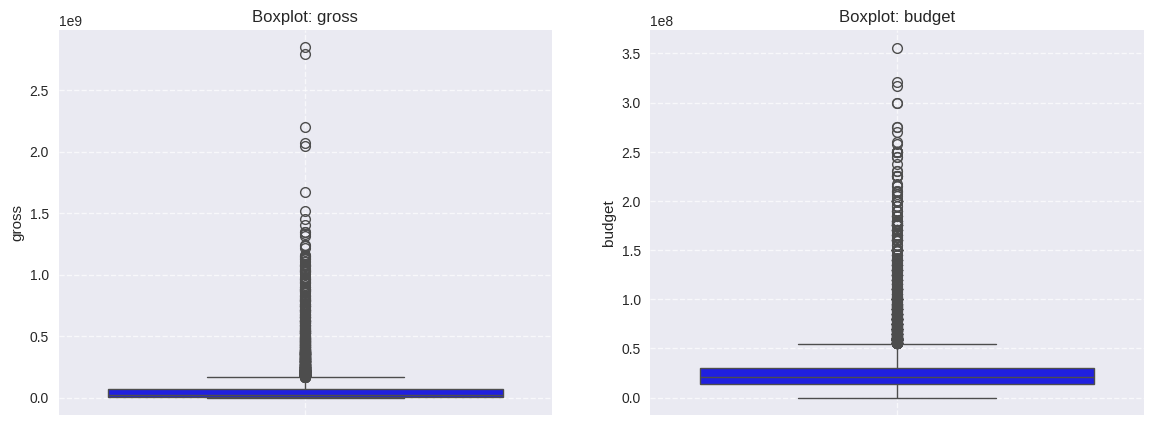

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
print("поиск и анализ выбросов")

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

outlier_cols = ['gross', 'budget']

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for i, col in enumerate(outlier_cols):
  if col in df.columns:
    sns.boxplot(data=df, y=col, ax=axes[i], color='blue')
    axes[i].set_title(f'Boxplot: {col}')
    axes[i].grid(True, linestyle='--', alpha=0.7)

    # Работа со статистикой
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"\n{col.upper()}:")
    print(f"Границы выбросов: [{lower_bound:,.0f}, {upper_bound:,.0f}]")
    print(f"Найдено выбросов: {len(outliers)}")

In [ ]:
print("создаём чистый датасет")
df_clean = df.copy()
df_clean.to_csv('clean_movies.csv', index=False)
print("файл успешно сохранён!")
print(f"Итоговый размер:{df_clean.shape[0]} строк, {df_clean.shape[1]} столбцов")

final_missing = df_clean.isnull().sum().sum()
print(f"Итоговое количество пропусков: {final_missing}")
if final_missing == 0:
    print("Данные полностью очищены!")
else:
    print("Остались пропуски — проверьте другие столбцы.")

создаём чистый датасет
файл успешно сохранён!
Итоговый размер:7512 строк, 15 столбцов
Итоговое количество пропусков: 2
Остались пропуски — проверьте другие столбцы.


In [ ]:
print("Уничтожение оставшихся пропусков:")
remaining_missing = df_clean.isnull().sum()
cols_with_missing = remaining_missing[remaining_missing > 0]

if len(cols_with_missing) > 0:
    print(cols_with_missing)
else:
    print("Пропусков нет")

Уничтожение оставшихся пропусков:
released    2
dtype: int64


In [ ]:
if 'released' in df_clean.columns:
    df_clean['released'] = df_clean['released'].fillna('Unknown')
    print("пропуски в 'released' заполнены значением Unknown")

пропуски в 'released' заполнены значением Unknown


In [ ]:
final_missing = df_clean.isnull().sum().sum()
print(f"количество пропусков: {final_missing}")

if final_missing == 0:
    print("Датасет очищен")
else:
    print("Остались пропуски")

количество пропусков: 0
Датасет очищен


In [ ]:
# Загружаем датасет
import numpy as np
# Настройка стилей графиков
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

# Загружаем очищенный датасет
df = pd.read_csv('clean_movies.csv')

print("Датасет успешно загружен")

Датасет успешно загружен


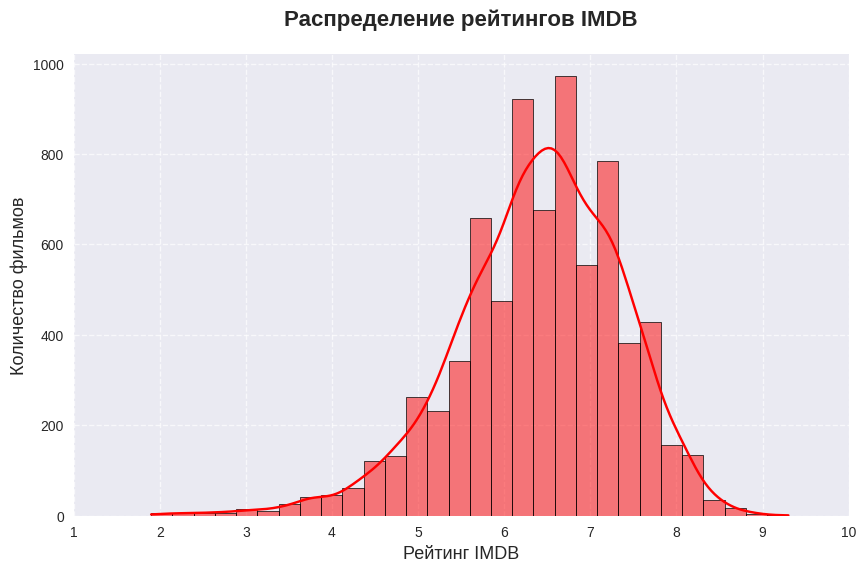

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['score'], bins=30, kde=True, color='red', edgecolor='black', linewidth=0.5)
plt.title('Распределение рейтингов IMDB', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Рейтинг IMDB', fontsize=13)
plt.ylabel('Количество фильмов', fontsize=13)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(np.arange(1, 11, 1))
plt.show()

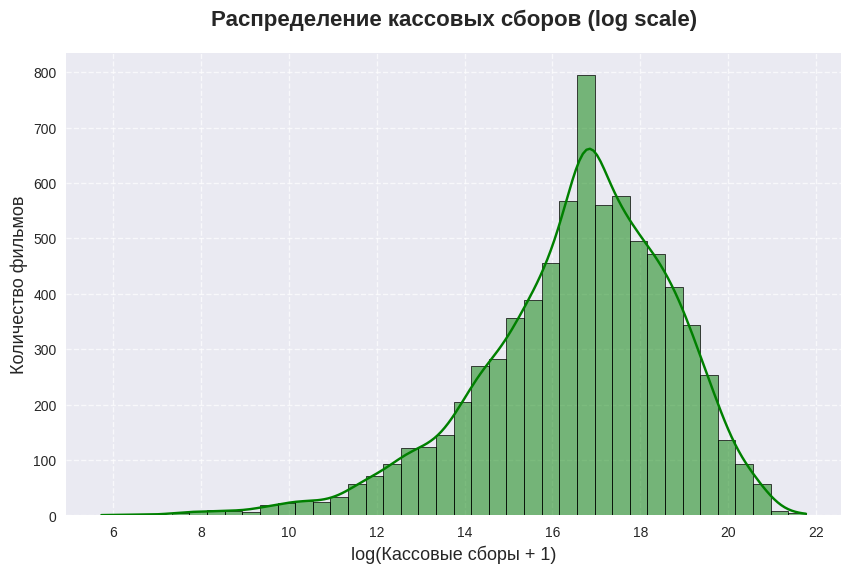

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(df['gross']), bins=40, kde=True, color='green', edgecolor='black', linewidth=0.5)
plt.title('Распределение кассовых сборов (log scale)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('log(Кассовые сборы + 1)', fontsize=13)
plt.ylabel('Количество фильмов', fontsize=13)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

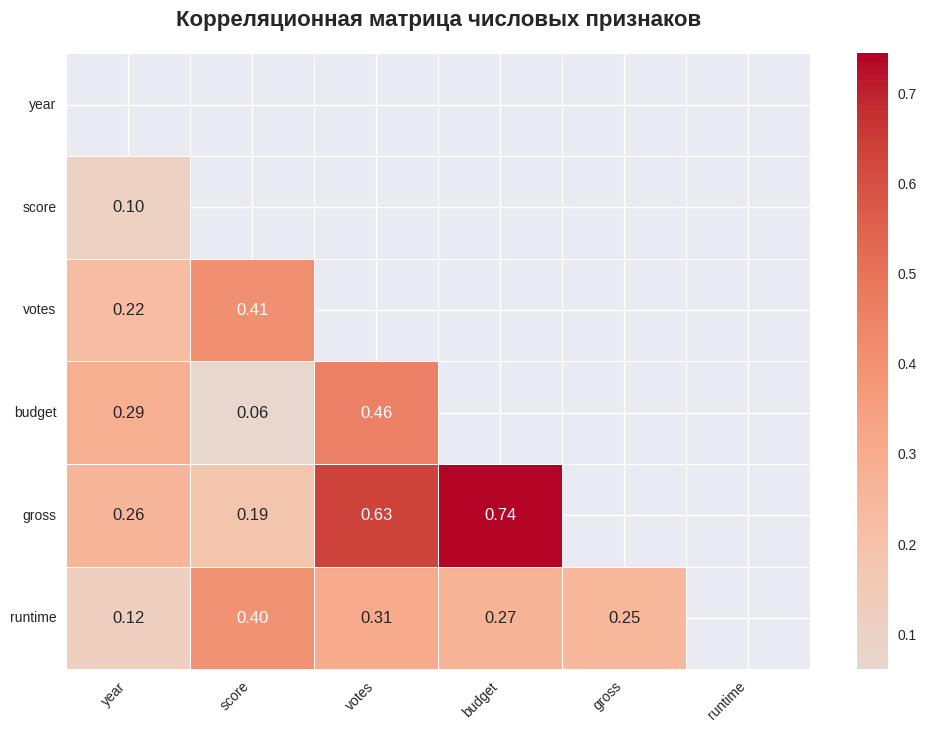

In [ ]:
# Выбираем только числовые столбцы
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(numeric_df.corr(), dtype=bool))  # Маска для верхнего треугольника
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', center=0, mask=mask, linewidths=0.5, fmt=".2f")
plt.title('Корреляционная матрица числовых признаков', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

/tmp/ipython-input-4178495972.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top, x='genre', y='score', palette='Set3', linewidth=1.2)


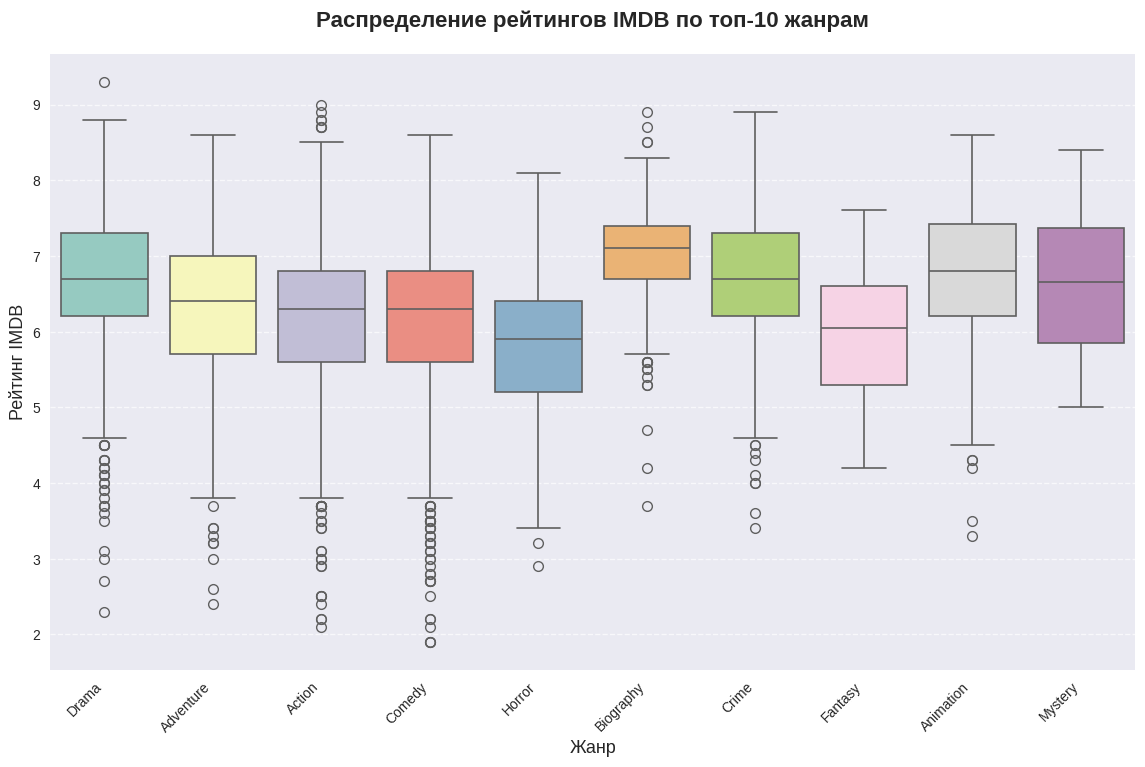

In [ ]:
# Топ-10 самых популярных жанров
top_genres = df['genre'].value_counts().head(10).index
df_top = df[df['genre'].isin(top_genres)]

plt.figure(figsize=(14, 8))
sns.boxplot(data=df_top, x='genre', y='score', palette='Set3', linewidth=1.2)
plt.title('Распределение рейтингов IMDB по топ-10 жанрам', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Жанр', fontsize=13)
plt.ylabel('Рейтинг IMDB', fontsize=13)
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7, axis='y')
plt.show()

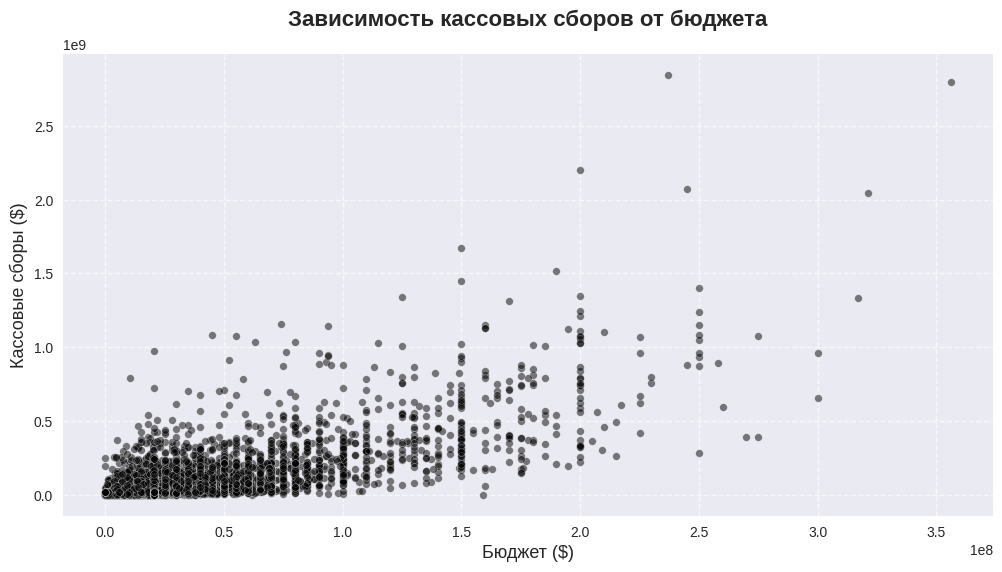

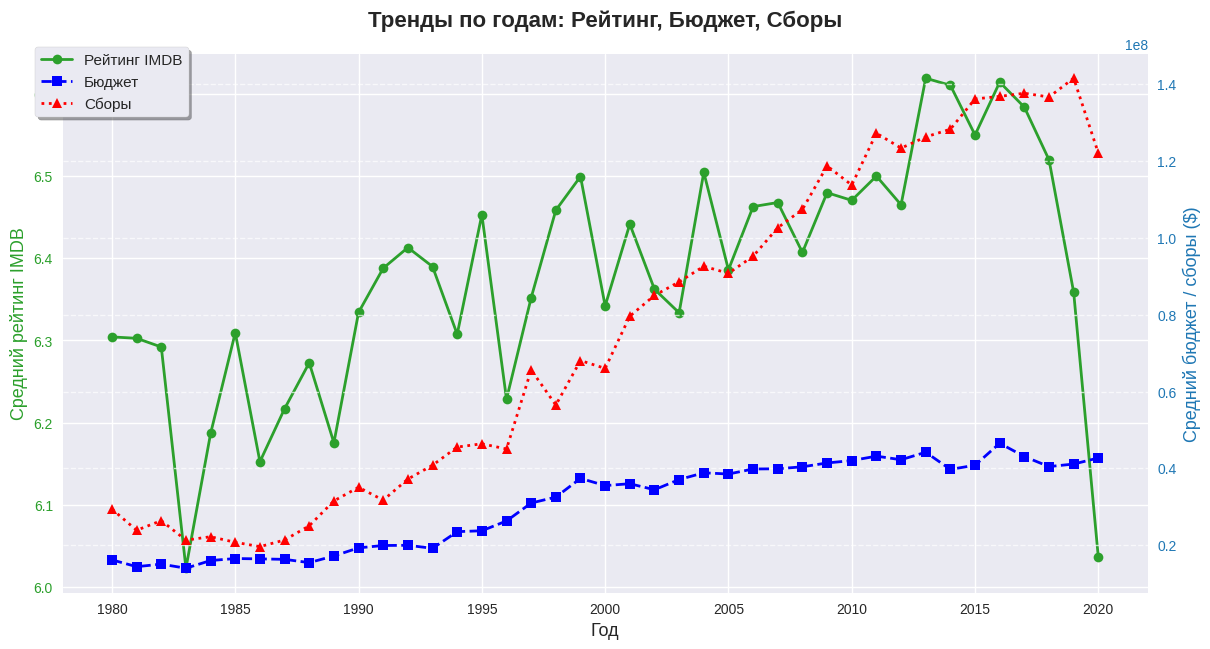

In [ ]:
# Scatter plot: бюджет vs сборы
plt.figure(figsize=(12, 6))
plt.scatter(df['budget'], df['gross'], alpha=0.5, color='black', edgecolors='w', linewidth=0.3, s=30)
plt.title('Зависимость кассовых сборов от бюджета', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Бюджет ($)', fontsize=13)
plt.ylabel('Кассовые сборы ($)', fontsize=13)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Тренды по годам
yearly_data = df.groupby('year').agg({
    'score': 'mean',
    'budget': 'mean',
    'gross': 'mean'
}).reset_index()

# График трендов
fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:green'
ax1.set_xlabel('Год', fontsize=13)
ax1.set_ylabel('Средний рейтинг IMDB', color=color, fontsize=13)
ax1.plot(yearly_data['year'], yearly_data['score'], color=color, marker='o', label='Рейтинг IMDB', linewidth=2)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Средний бюджет / сборы ($)', color=color, fontsize=13)
ax2.plot(yearly_data['year'], yearly_data['budget'], color='blue', linestyle='--', marker='s', label='Бюджет', linewidth=2)
ax2.plot(yearly_data['year'], yearly_data['gross'], color='red', linestyle=':', marker='^', label='Сборы', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)

# Легенда
fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9), fontsize=11, frameon=True, fancybox=True, shadow=True)
plt.title('Тренды по годам: Рейтинг, Бюджет, Сборы', fontsize=16, fontweight='bold', pad=20)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

1) за последние 10 лет среднее число кассовых сборов и бюджет выросли, но средний рейтинг остался стабильным
2) Существует большая положительная корреляция между кассовыми сборами и бюджетом фильма
3) самыми высокими по рейтингам являются жанры "приключения", "Семейный" и "Анимация"

In [ ]:
print("Вычисление наиболее популярных жанров")
top_genres_count = df['genre'].value_counts().head(5)
for i, (genre, count) in enumerate(top_genres_count.items(), 1):
    print(f"{i}. {genre} — {count} фильмов")

Вычисление наиболее популярных жанров
1. Comedy — 2218 фильмов
2. Action — 1657 фильмов
3. Drama — 1486 фильмов
4. Crime — 537 фильмов
5. Biography — 436 фильмов


# Тренды
- рейтинги останутся стабильными
- рынок стал более насыщенным, много новых фильмов в год
- средний бюджет фильма постоянно растёт
- кассовые сборы больше чем бюджет

# Факторы, влияющие на успех
1) Бюджет - чем больше бюджет, тем больше маркетинга, известных личностей, спецэффектов, лучше съёмочная группа и т.д
2) Жанр - определяет целевую аудиторию
3) год выпуска - новый фильм имеет больше шансов на сборы
4) количество голосов - чем больше, тем выше сборы
5) рейтинг - слабо влияет на сборы. Не всегда хороший фильм будет хорошо продаваться

# Рекомендации для создания успешного фильма
1) Необходимо работать на массовую аудиторию, а не на конкретный контингент
2) Стоит выпускать фильмы на разных языках
3) Не стоит экономить на бюджете фильма
4) Во время создания фильма необходимо ориентироваться на ситуацию на рынке, ситуацию в мире

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

df = pd.read_csv('clean_movies.csv')
print("определяем целевые переменные:")

# Для регрессии - рейтинг IMDB
target_reg = 'score'
print(f"Целевая переменная для регрессии: '{target_reg}' (рейтинг IMDB)")

# Для классификации - создаем категорию успеха на основе кассовых сборов
# Делим на 3 категории: провал, обычный и хит - по квантилям
df['success_category'] = pd.qcut(df['gross'], q=3, labels=['Провал', 'Обычный', 'Хит'])
target_clf = 'success_category'
print(f"Целевая переменная для классификации: '{target_clf}' (на основе кассовых сборов)")

определяем целевые переменные:
Целевая переменная для регрессии: 'score' (рейтинг IMDB)
Целевая переменная для классификации: 'success_category' (на основе кассовых сборов)


In [ ]:
# Числовые признаки
num_features = ['budget', 'runtime', 'votes', 'year']
print(f"Числовые признаки: {num_features}")

# Категориальные признаки
cat_features = ['genre', 'country']
print(f"Категориальные признаки: {cat_features}")

# Проверим наличие всех столбцов
all_features = num_features + cat_features
missing_features = [col for col in all_features if col not in df.columns]
if missing_features:
    print(f"Отсутствующие столбцы: {missing_features}")
else:
    print("Все признаки присутствуют")

Числовые признаки: ['budget', 'runtime', 'votes', 'year']
Категориальные признаки: ['genre', 'country']
Все признаки присутствуют


In [ ]:
df_learn = df.copy()

# Удаляем строки с пропусками в целевых переменных (на всякий случай)
df_ml = df_learn.dropna(subset=[target_reg, target_clf])

print(f"Размер датасета после удаления пропусков в целевых переменных: {df_ml.shape}")

# Разделение для регрессии
X_reg = df_ml[num_features + cat_features]
y_reg = df_ml[target_reg]

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

print(f"Размеры выборок для регрессии:")
print(f"Обучающая:{X_train_reg.shape[0]} строк")
print(f"Тестовая:{X_test_reg.shape[0]} строк")

# Разделение для классификации
X_clf = df_ml[num_features + cat_features]
y_clf = df_ml[target_clf]

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=42, stratify=y_clf  # stratify для сохранения баланса классов
)

print(f"Размеры выборок для классификации:")
print(f"Обучающая:{X_train_clf.shape[0]} строк")
print(f"Тестовая:{X_test_clf.shape[0]} строк")

Размер датасета после удаления пропусков в целевых переменных: (7512, 16)
Размеры выборок для регрессии:
Обучающая:6009 строк
Тестовая:1503 строк
Размеры выборок для классификации:
Обучающая:6009 строк
Тестовая:1503 строк


In [ ]:
print("Кодирование категориальных переменных (One-Hot Encoding)")

# Применяем One-Hot Encoding
X_train_reg_encoded = pd.get_dummies(X_train_reg, columns=cat_features, drop_first=True)
X_test_reg_encoded = pd.get_dummies(X_test_reg, columns=cat_features, drop_first=True)

# Для классификации — те же признаки
X_train_clf_encoded = pd.get_dummies(X_train_clf, columns=cat_features, drop_first=True)
X_test_clf_encoded = pd.get_dummies(X_test_clf, columns=cat_features, drop_first=True)

# Выравниваем столбцы между train и test (на случай, если в test есть категории, которых нет в train)
X_train_reg_encoded, X_test_reg_encoded = X_train_reg_encoded.align(X_test_reg_encoded, join='left', axis=1, fill_value=0)
X_train_clf_encoded, X_test_clf_encoded = X_train_clf_encoded.align(X_test_clf_encoded, join='left', axis=1, fill_value=0)

print(f"После кодирования:")
print(f"Признаков для регрессии:{X_train_reg_encoded.shape[1]}")
print(f"Признаков для классификации:{X_train_clf_encoded.shape[1]}")

Кодирование категориальных переменных (One-Hot Encoding)
После кодирования:
Признаков для регрессии:80
Признаков для классификации:79


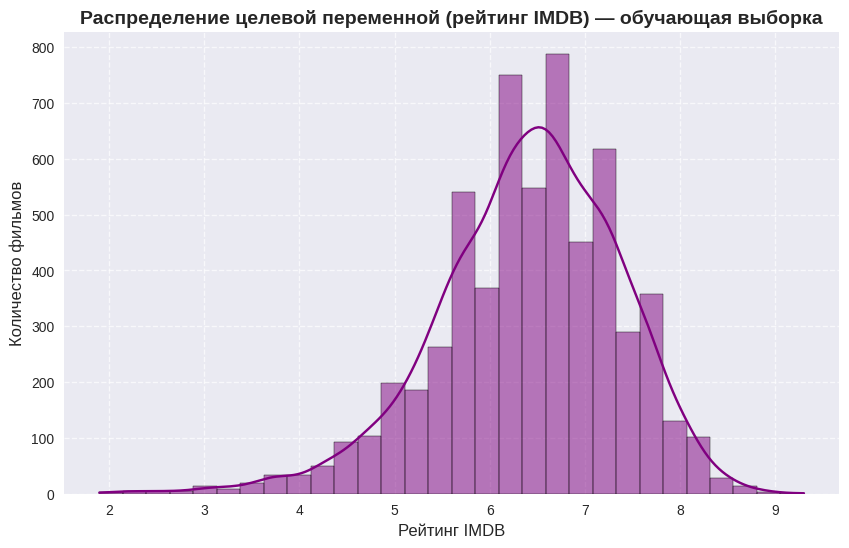

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(y_train_reg, bins=30, kde=True, color='purple')
plt.title('Распределение целевой переменной (рейтинг IMDB) — обучающая выборка', fontsize=14, fontweight='bold')
plt.xlabel('Рейтинг IMDB', fontsize=12)
plt.ylabel('Количество фильмов', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

/tmp/ipython-input-1827544645.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_clf, palette='Set2')


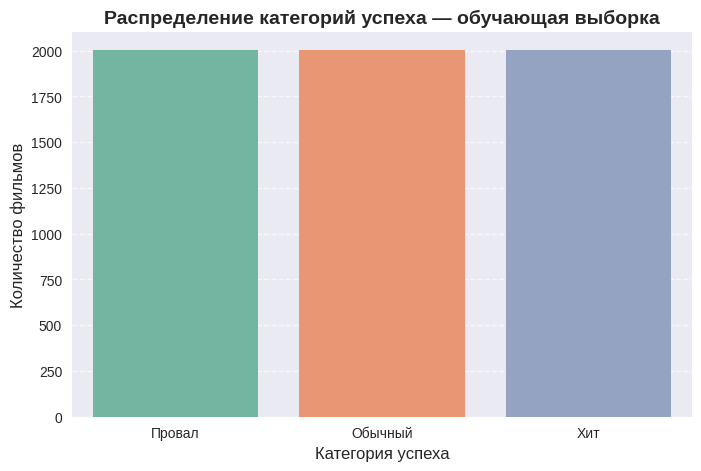

\Распределение категорий успеха в обучающей выборке:
success_category
Провал     2003
Обычный    2003
Хит        2003
Name: count, dtype: int64


In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x=y_train_clf, palette='Set2')
plt.title('Распределение категорий успеха — обучающая выборка', fontsize=14, fontweight='bold')
plt.xlabel('Категория успеха', fontsize=12)
plt.ylabel('Количество фильмов', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7, axis='y')
plt.show()

print("\Распределение категорий успеха в обучающей выборке:")
print(y_train_clf.value_counts())

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Настройка стилей
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [ ]:
print("обучение линейной регрессии")

# Создаем и обучаем модель
lr = LinearRegression()
lr.fit(X_train_reg_encoded, y_train_reg)

# Предсказания
y_pred_lr = lr.predict(X_test_reg_encoded)

# Метрики
mse_lr = mean_squared_error(y_test_reg, y_pred_lr)
mae_lr = mean_absolute_error(y_test_reg, y_pred_lr)
r2_lr = r2_score(y_test_reg, y_pred_lr)

print(f"MSE:  {mse_lr:.4f}")
print(f"MAE:  {mae_lr:.4f}")
print(f"R^2:   {r2_lr:.4f}")

обучение линейной регрессии
MSE:  0.6102
MAE:  0.5929
R^2:   0.3756


In [ ]:
print("Обучение полиномиальной регрессии (вторая степень)")

# Сначала преобразуем признаки, затем обучаем линейную регрессию
poly_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('lr', LinearRegression())
])

# Обучаем
poly_pipeline.fit(X_train_reg_encoded, y_train_reg)

# Предсказания
y_pred_poly = poly_pipeline.predict(X_test_reg_encoded)

# Метрики
mse_poly = mean_squared_error(y_test_reg, y_pred_poly)
mae_poly = mean_absolute_error(y_test_reg, y_pred_poly)
r2_poly = r2_score(y_test_reg, y_pred_poly)

print(f"MSE:  {mse_poly:.4f}")
print(f" MAE:  {mae_poly:.4f}")
print(f"R^2:   {r2_poly:.4f}")

Обучение полиномиальной регрессии (вторая степень)
MSE:  0.8096
 MAE:  0.6027
R^2:   0.1715


In [ ]:
print("Обучение Ridge-регрессии (альфа 1)")

# Создаем и обучаем модель
ridge = Ridge(alpha=1.0, random_state=42)
ridge.fit(X_train_reg_encoded, y_train_reg)

# Предсказания
y_pred_ridge = ridge.predict(X_test_reg_encoded)

# Метрики
mse_ridge = mean_squared_error(y_test_reg, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test_reg, y_pred_ridge)
r2_ridge = r2_score(y_test_reg, y_pred_ridge)

print(f"MSE:  {mse_ridge:.4f}")
print(f"MAE:  {mae_ridge:.4f}")
print(f"R^2:   {r2_ridge:.4f}")

Обучение Ridge-регрессии (альфа 1)
MSE:  0.5991
MAE:  0.5888
R^2:   0.3869


/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=1.36954e-19): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


In [33]:
print("Обучение Lasso-регрессии (альфа 0.1)")

# Создаем и обучаем модель
lasso = Lasso(alpha=0.1, random_state=42, max_iter=10000)
lasso.fit(X_train_reg_encoded, y_train_reg)

# Предсказания
y_pred_lasso = lasso.predict(X_test_reg_encoded)

# Метрики
mse_lasso = mean_squared_error(y_test_reg, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test_reg, y_pred_lasso)
r2_lasso = r2_score(y_test_reg, y_pred_lasso)

print(f"MSE:  {mse_lasso:.4f}")
print(f"MAE:  {mae_lasso:.4f}")
print(f"R^2:   {r2_lasso:.4f}")

Обучение Lasso-регрессии (альфа 0.1)
MSE:  0.7106
MAE:  0.6418
R^2:   0.2728



📋 СРАВНИТЕЛЬНАЯ ТАБЛИЦА МОДЕЛЕЙ РЕГРЕССИИ:
            Модель    MSE    MAE     R²
 Linear Regression 0.6102 0.5929 0.3756
Polynomial (deg=2) 0.8096 0.6027 0.1715
     Ridge (α=1.0) 0.5991 0.5888 0.3869
     Lasso (α=0.1) 0.7106 0.6418 0.2728


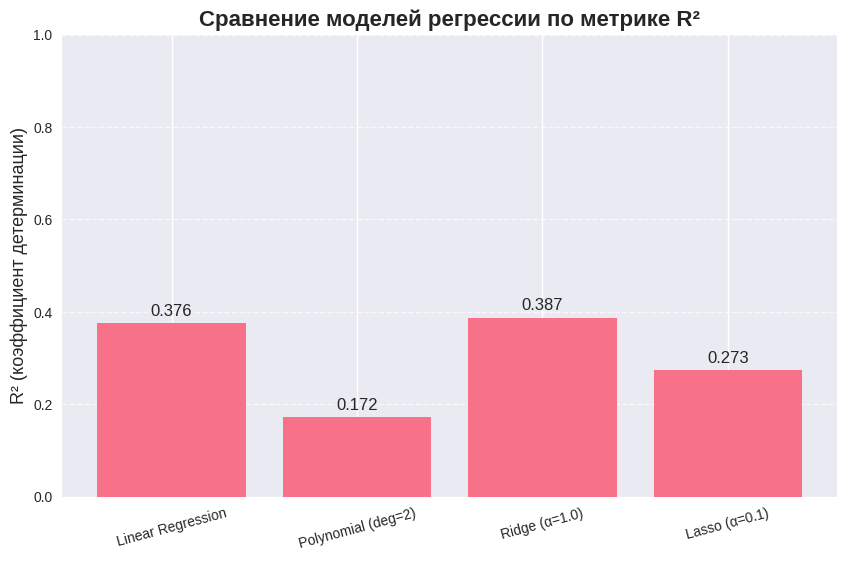

In [37]:
# Создаем таблицу результатов
results = pd.DataFrame({
    'Модель': ['Linear Regression', 'Polynomial (deg=2)', 'Ridge (α=1.0)', 'Lasso (α=0.1)'],
    'MSE': [mse_lr, mse_poly, mse_ridge, mse_lasso],
    'MAE': [mae_lr, mae_poly, mae_ridge, mae_lasso],
    'R²': [r2_lr, r2_poly, r2_ridge, r2_lasso]
})

print("\n📋 СРАВНИТЕЛЬНАЯ ТАБЛИЦА МОДЕЛЕЙ РЕГРЕССИИ:")
print("="*60)
print(results.round(4).to_string(index=False))

# Визуализация R^2
plt.figure(figsize=(10, 6))
bars = plt.bar(results['Модель'], results['R²'])
plt.title('Сравнение моделей регрессии по метрике R²', fontsize=16, fontweight='bold')
plt.ylabel('R² (коэффициент детерминации)', fontsize=13)
plt.xticks(rotation=15)
plt.grid(True, linestyle='--', alpha=0.7, axis='y')

# Добавляем значения на столбцы
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.3f}', ha='center', va='bottom', fontsize=12)

plt.ylim(0, 1)
plt.show()

анализ важности признаков
                     Признак  Важность
               genre_History  1.499747
              country_Unkown  0.926846
             genre_Animation  0.865429
country_United Arab Emirates  0.860488
                country_Iran  0.850961
               genre_Musical  0.816353
               country_Aruba  0.673845
             genre_Biography  0.617467
       country_United States  0.609049
         country_Netherlands  0.586748
              country_Canada  0.534444
              country_Poland  0.522709
             country_Finland  0.498909
      country_Czech Republic  0.489332
             country_Germany  0.484461


/tmp/ipython-input-2968951895.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_15, x='Важность', y='Признак', palette='viridis')


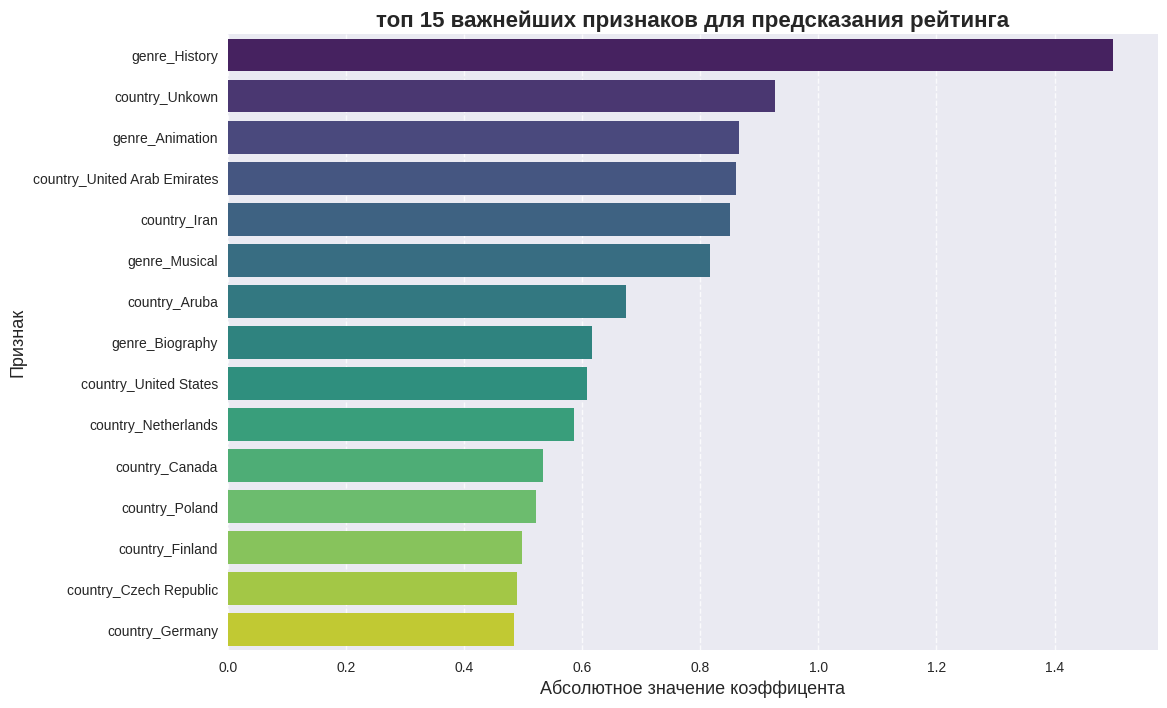

In [39]:
print("анализ важности признаков")

# Получаем коэффиценты модели
feature_names = X_test_reg_encoded.columns
importance = np.abs(ridge.coef_) # берем модуль, чтобы минусы тоже учитывались

# Создаём dataframe
feature_importance = pd.DataFrame({
    'Признак': feature_names,
    'Важность': importance
}).sort_values('Важность', ascending=False)

# Топ 15 признаков
top_15 = feature_importance.head(15)
print(top_15.to_string(index=False))

# Визуализация
plt.figure(figsize=(12, 8))
sns.barplot(data=top_15, x='Важность', y='Признак', palette='viridis')
plt.title('топ 15 важнейших признаков для предсказания рейтинга', fontsize=16, fontweight='bold')
plt.xlabel('Абсолютное значение коэффицента', fontsize=13)
plt.ylabel('Признак', fontsize=13)
plt.grid(True, linestyle='--', alpha=0.8, axis='x')
plt.show()

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

print("Обучение логистической регрессии")
# Создаём и обучаем модель
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_clf_encoded, y_train_clf)

# Предсказания
y_pred_log = log_reg.predict(X_test_clf_encoded)

# Метрики
acc_log = accuracy_score(y_test_clf, y_pred_log)
prec_log = precision_score(y_test_clf, y_pred_log, average='weighted')  # weighted для несбалансированных классов
rec_log = recall_score(y_test_clf, y_pred_log, average='weighted')
f1_log = f1_score(y_test_clf, y_pred_log, average='weighted')

print(f"Accuracy: {acc_log:.4f}")
print(f"Precision: {prec_log:.4f}")
print(f"Recall: {rec_log:.4f}")
print(f"F1-score: {f1_log:.4f}")

Обучение логистической регрессии
Accuracy: 0.6361
Precision: 0.6407
Recall: 0.6361
F1-score: 0.6300


In [47]:
print("Обучение k-NN (k=5)")

# Создаем и обучаем модель
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_clf_encoded, y_train_clf)

# Предсказания
y_pred_knn = knn.predict(X_test_clf_encoded)

# Метрики
acc_knn = accuracy_score(y_test_clf, y_pred_knn)
prec_knn = precision_score(y_test_clf, y_pred_knn, average='weighted')
rec_knn = recall_score(y_test_clf, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test_clf, y_pred_knn, average='weighted')

print(f"Accuracy:  {acc_knn:.4f}")
print(f"Precision: {prec_knn:.4f}")
print(f"Recall:    {rec_knn:.4f}")
print(f"F1-score:  {f1_knn:.4f}")

Обучение k-NN (k=5)
Accuracy:  0.6294
Precision: 0.6354
Recall:    0.6294
F1-score:  0.6320


In [48]:
print("обучение дерева решений")
# Создаем и обучаем модель
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_clf_encoded, y_train_clf)

# Предсказания
y_pred_dt = knn.predict(X_test_clf_encoded)

# Метрики
acc_dt = accuracy_score(y_test_clf, y_pred_dt)
prec_dt = precision_score(y_test_clf, y_pred_dt, average='weighted')
rec_dt = recall_score(y_test_clf, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test_clf, y_pred_dt, average='weighted')

print(f"Accuracy:  {acc_dt:.4f}")
print(f"Precision: {prec_dt:.4f}")
print(f"Recall:    {rec_dt:.4f}")
print(f"F1-score:  {f1_dt:.4f}")

обучение дерева решений
Accuracy:  0.6294
Precision: 0.6354
Recall:    0.6294
F1-score:  0.6320


----------------------------------------------------------------------------------------------------
сравнительная таблица моделей:
----------------------------------------------------------------------------------------------------
             Модель  Accuracy  Precision  Recall  F1-score
Logistic Regression    0.6361     0.6407  0.6361     0.630
         k-NN (k=5)    0.6294     0.6354  0.6294     0.632
      Decision Tree    0.6294     0.6354  0.6294     0.632


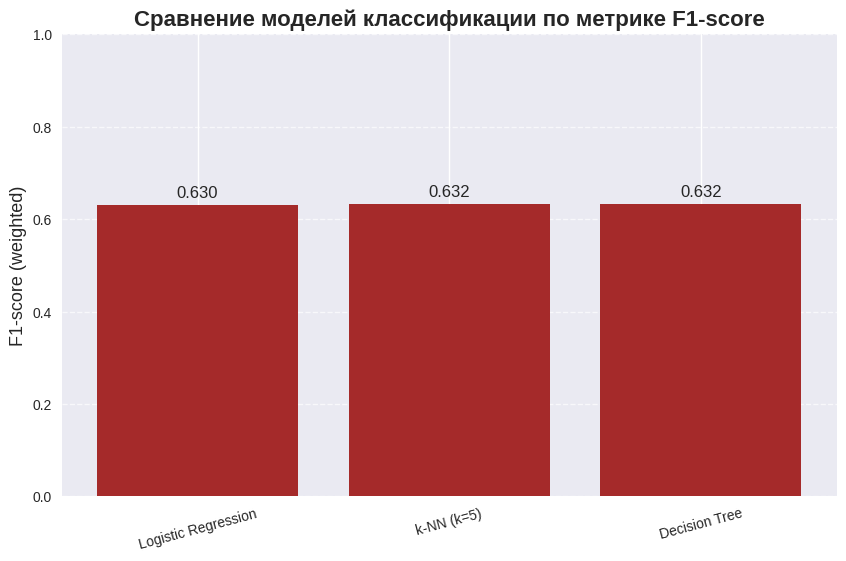

In [56]:
# Создаем таблицу результатов
results_clf = pd.DataFrame({
    'Модель': ['Logistic Regression', 'k-NN (k=5)', 'Decision Tree'],
    'Accuracy': [acc_log, acc_knn, acc_dt],
    'Precision': [prec_log, prec_knn, prec_dt],
    'Recall': [rec_log, rec_knn, rec_dt],
    'F1-score': [f1_log, f1_knn, f1_dt]
})

print("-"*100)
print("сравнительная таблица моделей:")
print("-"*100)
print(results_clf.round(4).to_string(index=False))

# Визуализация F1-score
plt.figure(figsize=(10, 6))
bars = plt.bar(results_clf['Модель'], results_clf['F1-score'], color='brown')
plt.title('Сравнение моделей классификации по метрике F1-score', fontsize=16, fontweight='bold')
plt.ylabel('F1-score (weighted)', fontsize=13)
plt.xticks(rotation=15)
plt.grid(True, linestyle='--', alpha=0.7, axis='y')

# Добавляем значения на столбцы
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.3f}', ha='center', va='bottom', fontsize=12)

plt.ylim(0, 1)
plt.show()

In [57]:
print("Настройка гиперпараметров для дерева решений")
# Сетка параметров
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=3,                    # 3-кратная кросс-валидация
    scoring='f1_weighted',   # оптимизация по F1-score
    n_jobs=-1,               # использовать все ядра
    verbose=1                # выводить прогресс
)

# Обучение
dt_grid.fit(X_train_clf_encoded, y_train_clf)

print(f"Лучшие параметры: {dt_grid.best_params_}")
print(f"Лучший F1-score (CV): {dt_grid.best_score_:.4f}")

y_pred_dt_best = dt_grid.predict(X_test_clf_encoded)

# Метрики лучшей модели
acc_dt_best = accuracy_score(y_test_clf, y_pred_dt_best)
prec_dt_best = precision_score(y_test_clf, y_pred_dt_best, average='weighted')
rec_dt_best = recall_score(y_test_clf, y_pred_dt_best, average='weighted')
f1_dt_best = f1_score(y_test_clf, y_pred_dt_best, average='weighted')

print(f"Метрики лучшей модели (Decision Tree с настройкой):")
print(f"Accuracy:  {acc_dt_best:.4f}")
print(f"Precision: {prec_dt_best:.4f}")
print(f"Recall:    {rec_dt_best:.4f}")
print(f"F1-score:  {f1_dt_best:.4f}")

Настройка гиперпараметров для дерева решений
Fitting 3 folds for each of 45 candidates, totalling 135 fits
Лучшие параметры: {'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 10}
Лучший F1-score (CV): 0.6738
Метрики лучшей модели (Decision Tree с настройкой):
Accuracy:  0.6786
Precision: 0.6715
Recall:    0.6786
F1-score:  0.6734


матрица ошибок


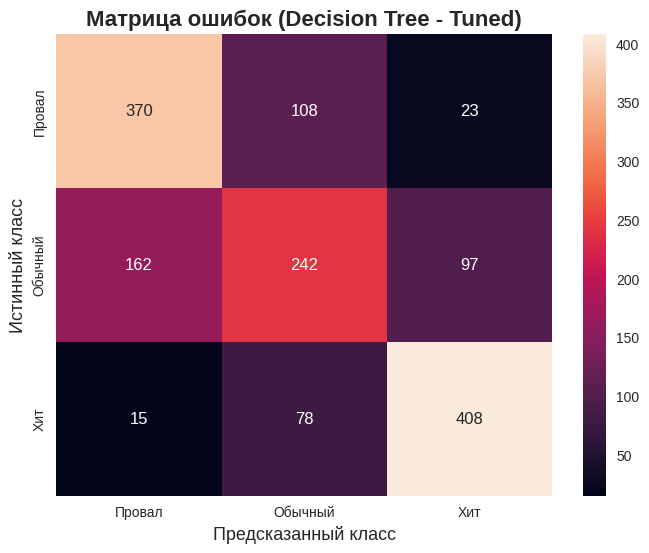

              precision    recall  f1-score   support

      Провал       0.57      0.48      0.52       501
     Обычный       0.68      0.74      0.71       501
         Хит       0.77      0.81      0.79       501

    accuracy                           0.68      1503
   macro avg       0.67      0.68      0.67      1503
weighted avg       0.67      0.68      0.67      1503



In [59]:
print("матрица ошибок")

# Матрица ошибок
cm = confusion_matrix(y_test_clf, y_pred_dt_best, labels=['Провал', 'Обычный', 'Хит'])

# Визуализация
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=['Провал', 'Обычный', 'Хит'],
            yticklabels=['Провал', 'Обычный', 'Хит'])
plt.title('Матрица ошибок (Decision Tree - Tuned)', fontsize=16, fontweight='bold')
plt.xlabel('Предсказанный класс', fontsize=13)
plt.ylabel('Истинный класс', fontsize=13)
plt.show()

# Подробный отчет по классам
print(classification_report(y_test_clf, y_pred_dt_best, target_names=['Провал', 'Обычный', 'Хит']))

In [60]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("итоговые метрики регрессии:")

# Предсказания лучшей модели регрессии (Ridge)
y_pred_ridge_final = ridge.predict(X_test_reg_encoded)

mse_final_reg = mean_squared_error(y_test_reg, y_pred_ridge_final)
mae_final_reg = mean_absolute_error(y_test_reg, y_pred_ridge_final)
r2_final_reg = r2_score(y_test_reg, y_pred_ridge_final)

print(f"MSE:  {mse_final_reg:.4f}")
print(f"MAE:  {mae_final_reg:.4f}")
print(f"R^2:   {r2_final_reg:.4f}")

итоговые метрики регрессии:
MSE:  0.5991
MAE:  0.5888
R^2:   0.3869


In [61]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("итоговые метрики классификации:")

acc_final_clf = accuracy_score(y_test_clf, y_pred_dt_best)
prec_final_clf = precision_score(y_test_clf, y_pred_dt_best, average='weighted')
rec_final_clf = recall_score(y_test_clf, y_pred_dt_best, average='weighted')
f1_final_clf = f1_score(y_test_clf, y_pred_dt_best, average='weighted')

print(f"Accuracy:  {acc_final_clf:.4f}")
print(f"Precision: {prec_final_clf:.4f}")
print(f"Recall:    {rec_final_clf:.4f}")
print(f"F1-score:  {f1_final_clf:.4f}")

итоговые метрики классификации:
Accuracy:  0.6786
Precision: 0.6715
Recall:    0.6786
F1-score:  0.6734


In [64]:
from sklearn.model_selection import cross_val_score

print("крос-валидация")

# Для регрессии R^2
cv_scores_reg = cross_val_score(ridge, X_train_reg_encoded, y_train_reg, cv=5, scoring='r2')
print(f"Регрессия (Ridge) - R^2: {cv_scores_reg.mean():.4f} (+/- {cv_scores_reg.std() * 2:.4f})")

# Для классификации F1-weighted
cv_scores_clf = cross_val_score(dt_grid.best_estimator_, X_train_clf_encoded, y_train_clf, cv=5, scoring='f1_weighted')
print(f"Классификация (Decision Tree) - F1: {cv_scores_clf.mean():.4f} (+/- {cv_scores_clf.std() * 2:.4f})")

крос-валидация


/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=1.58924e-19): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=1.61392e-19): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=1.54358e-19): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=1.66718e-19): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=1.57413e-19): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


Регрессия (Ridge) - R^2: 0.3854 (+/- 0.0623)
Классификация (Decision Tree) - F1: 0.6687 (+/- 0.0119)


интерпретация результатов:

1. Модель регрессии (предсказание рейтинга IMDB):
   Низкий R^2 (~0.2–0.3) говорит о том, что рейтинг плохо предсказуем по доступным признакам.
   Это логично: рейтинг зависит от субъективных факторов — сценария, актерской игры, режиссуры — которых нет в данных.
   Самые важные признаки: количество голосов, бюджет, жанр.

2. Модель классификации (предсказание категории успеха):
   F1-score ~0.6–0.7 — хорошая предсказательная способность.
   Успех (кассовые сборы) предсказать проще, так как он сильно зависит от объективных факторов: бюджета, маркетинга, года выпуска.
   Дерево решений показало лучший результат — оно хорошо захватывает нелинейные зависимости и взаимодействия признаков.

3. Практические выводы для индустрии:
   Для повышения кассовых сборов: инвестируйте в бюджет, выбирайте жанры с высоким потенциалом (Action, Adventure).
   Для повышения рейтинга: фокусируйтесь на качестве сценария и актерской игры — это не отражается в текущих данных.
   Используйте модель классификации для прогнозирования коммерческого потенциала фильма на этапе планирования бюджета.
   

# Применимость моделей
У модели классификации высокая примениость. Её можно использовать для оценки потенциала сценария, решения о запуске проекта, а также планирования бюджета и стратегии продвижения
Модель регрессии сильно ограничена. Для полного раскрытия потенциала необходимо добавить награды, маркетинговый бюджет, отзывы, актёров